### The point of this part is to get the popularity of roles in each play, I will be using web-scraping to scrap the number of result google can give when we search a certain role in the play, I will rank the top 20 popular characters in a barh graph and compare it with the graph we got from previous sections.

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pprint as pp
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#Import dataframe
df = pd.read_csv("data/37_plays_Google Result.csv")
df = df[['Play','Player']].dropna()
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.head()

,Play,Player
0,Henry IV,KING HENRY IV
1,Henry IV,WESTMORELAND
2,Henry IV,FALSTAFF
3,Henry IV,PRINCE HENRY
4,Henry IV,POINS


In [6]:
#update dataframe
df = df.replace('A Winters Tale', 'A Winter\'s Tale')

In [7]:
#Combine roles and Plays and put them into a list of urls
URL = []
for i, j in zip(df.Play, df.Player):
    url = 'https://www.google.com/search?hl=en&q=' + i + '+'+ j
    URL.append(url)
df['URL'] = URL

In [8]:
df.head()

,Play,Player,URL
0,Henry IV,KING HENRY IV,https://www.google.com/search?hl=en&q=Henry IV...
1,Henry IV,WESTMORELAND,https://www.google.com/search?hl=en&q=Henry IV...
2,Henry IV,FALSTAFF,https://www.google.com/search?hl=en&q=Henry IV...
3,Henry IV,PRINCE HENRY,https://www.google.com/search?hl=en&q=Henry IV...
4,Henry IV,POINS,https://www.google.com/search?hl=en&q=Henry IV...


In [ ]:
#This is the section that does web scraping, please do not run this section, this will take up one and half hour.
resultStats = []
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
headers = {'User-Agent': user_agent}
for i in (df.URL):
    response = requests.get(i, headers = headers)
    scraping = BeautifulSoup(response.content, "html")
    element = scraping.find("div", attrs = {"id" : "resultStats"})
    if element is None:
        result = 0
    else:
        result = int(str(element.contents[0]).replace('About', '').replace(',', '').replace('results', ''))
    resultStats.append(result)
    time.sleep(1)

In [9]:
#This is the section that does web scraping, please do not run this section, this will take up one and half hour.
df['Resultstats'] = resultStats

NameError: name 'resultStats' is not defined

In [94]:
df.dtypes

Play           object
Player         object
URL            object
Resultstats     int64
dtype: object

In [11]:
df1 = pd.read_csv("data/37_plays_Google Result.csv")

In [9]:
#delet non-name value
filter_name = ['Servant', 'All', 'ALL', 'Captain', 'First Servant', 'Lord', 'First Gentleman', 'Second Gentleman', 'First Lord', 'Gentleman',
           'Second Servant', 'First Lord', 'Clown', 'Second Lord', 'Boy', 'First Citizen', 'First Soldier', 'Soldier', 'Both', 'Herald', 'Second Messenger', 
           'Officer', 'Page', 'Lords', 'Second Senator', 'First Witch', 'First Merchant', 'First Conspirator', 'Mariners', 'First Page', 'Second Page',
           'KING', 'BOTH', 'A Lord', 'Justice', 'ANOTHER'] 
df1 = df1[~df1['Player'].isin(filter_name)]

In [12]:
#Create a list for y-axis of my upcoming brah graph
df1['Play_and_Player'] = df1.Play + ': ' + df1.Player

In [13]:
df2 = df1[['Play_and_Player','Resultstats']]

In [14]:
df2.head()

,Play_and_Player,Resultstats
0,Henry IV: KING HENRY IV,74800000
1,Henry IV: WESTMORELAND,1240000
2,Henry IV: FALSTAFF,840000
3,Henry IV: PRINCE HENRY,30400000
4,Henry IV: POINS,113000


In [15]:
df2 = df2.set_index('Play_and_Player')

In [16]:
df2 = df2.sort_values(by ='Resultstats', ascending=False)

In [17]:
df2 = df2.head(20).sort_values(by ='Resultstats', ascending=True)

In [18]:
df2.head()

,Resultstats
Play_and_Player,
Richard II: GREEN,541000000
As you like it: OLIVER,557000000
Alls well that ends well: KING,605000000
King John: PETER,619000000
Alls well that ends well: KING EDWARD IV,646000000


Text(0.5, 1.0, "The top 20 popular roles in Shakespeare's plays (unit: billion)")

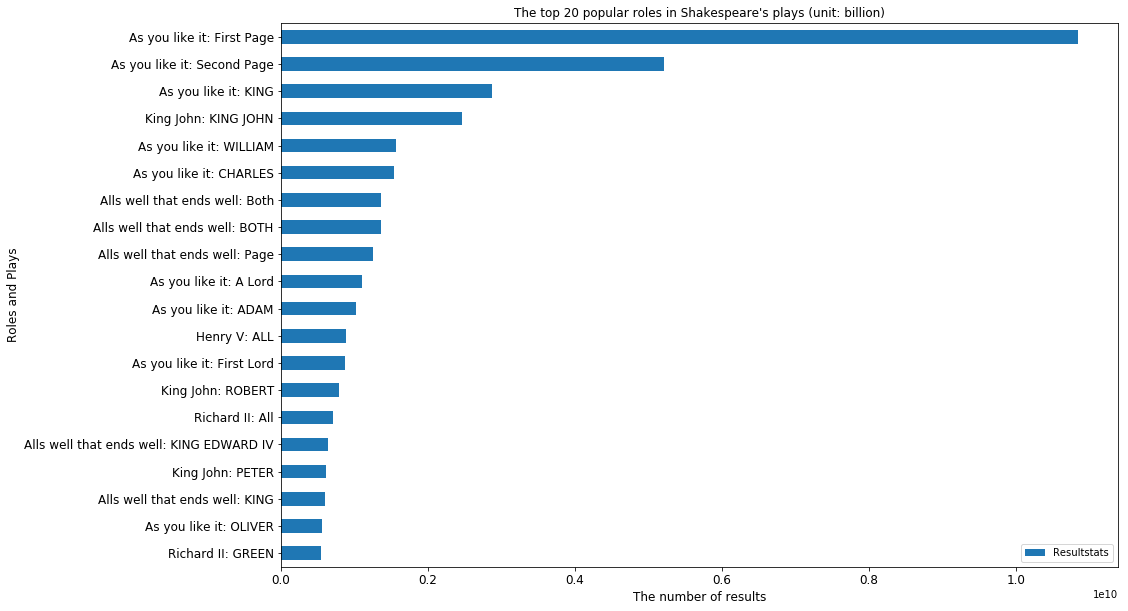

In [19]:
#Ploting results
df2.head(20).plot(kind = 'barh', figsize=(15, 10), fontsize = 12)
plt.xlabel('The number of results', fontsize = 12)
plt.ylabel('Roles and Plays', fontsize = 12)
plt.title('The top 20 popular roles in Shakespeare\'s plays (unit: billion)', fontsize = 12)